# This script analyses the NWB files

In [2]:
# import standard libraries

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import NullFormatter
import numpy as np
import os
import scipy
from scipy import stats
import pandas as pd 

import csv
from numpy import genfromtxt

#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import manifold
from time import time
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn import metrics
from sklearn.cluster import KMeans

# Plotting options
%matplotlib inline

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    

matplotlib.rcParams.update({'font.size': 15})


In [3]:
# Change parameters of the Figure size for sure

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    


# Load features and labels

In [7]:

# load the feature matrix
all_features_matrix = genfromtxt('ALL_EPHYS_FEATURES_MODELS_hipp_GC.csv', delimiter=' ')

# load the cell_type names
with open('ALL_EPHYS_FEATURES_MODELS_NAMES_hipp_GC.csv', 'r') as csvfile:
    cell_names = list(csv.reader(csvfile, delimiter=","))[0]

# load patient labels
with open('ALL_EPHYS_FEATURES_MODELS_LABELS_hipp_GC.csv', 'r') as csvfile:
    patient_label = list(csv.reader(csvfile, delimiter=","))[0]
    
patient_label=np.array(list(map(float, patient_label))).astype(int)

# load the feature_names
with open('ALL_EPHYS_FEATURES_MODELS_FEATURE_NAMES_hipp_GC.csv', 'r') as csvfile:
    feature_names = list(csv.reader(csvfile, delimiter=","))[0]


# Remove all rows that have more than 2 NaNs

Resulting matrix shape
(24, 31)


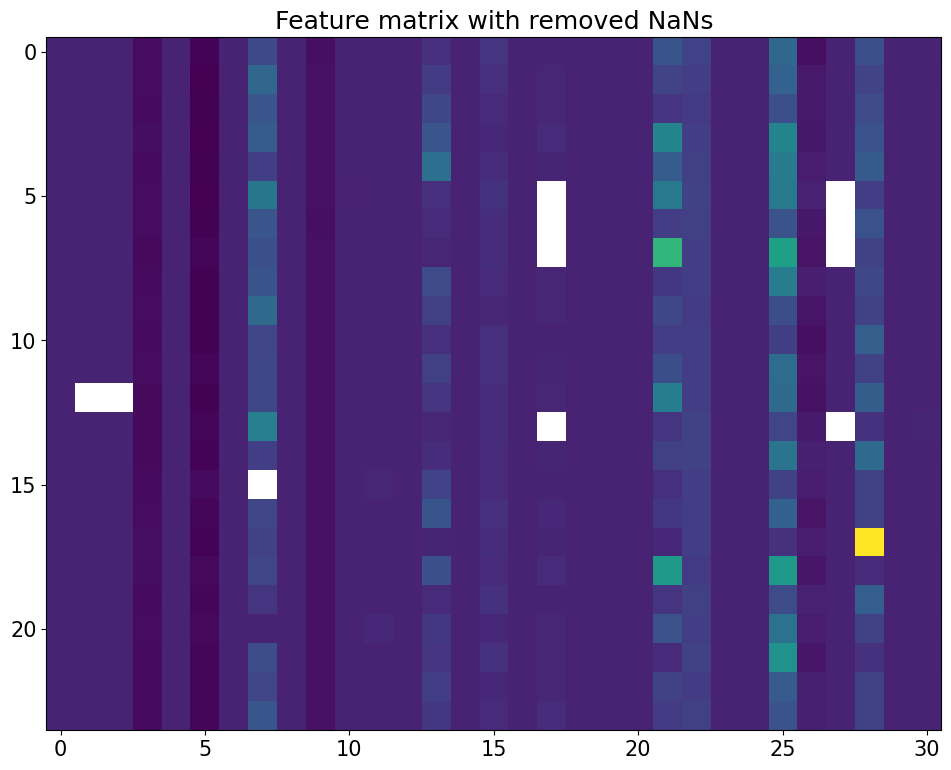

In [8]:
# remove all rows that have more than 5 NaNs

n_nan=np.zeros(len(all_features_matrix))

for i in np.arange(len(all_features_matrix)):
    # count the number of nans
    n_nan[i] = len(np.argwhere(np.isnan(all_features_matrix[i,:])))
    

# set up a threshold for the nan numbers
nan_thr=5
all_features_matrix_no_nan=all_features_matrix[np.where(n_nan<nan_thr)[0]]

plt.imshow(all_features_matrix_no_nan)
plt.title('Feature matrix with removed NaNs')
print('Resulting matrix shape')
print(all_features_matrix_no_nan.shape)

# Impute missing values using medians

Data length
24
Resulting matrix shape
(24, 31)


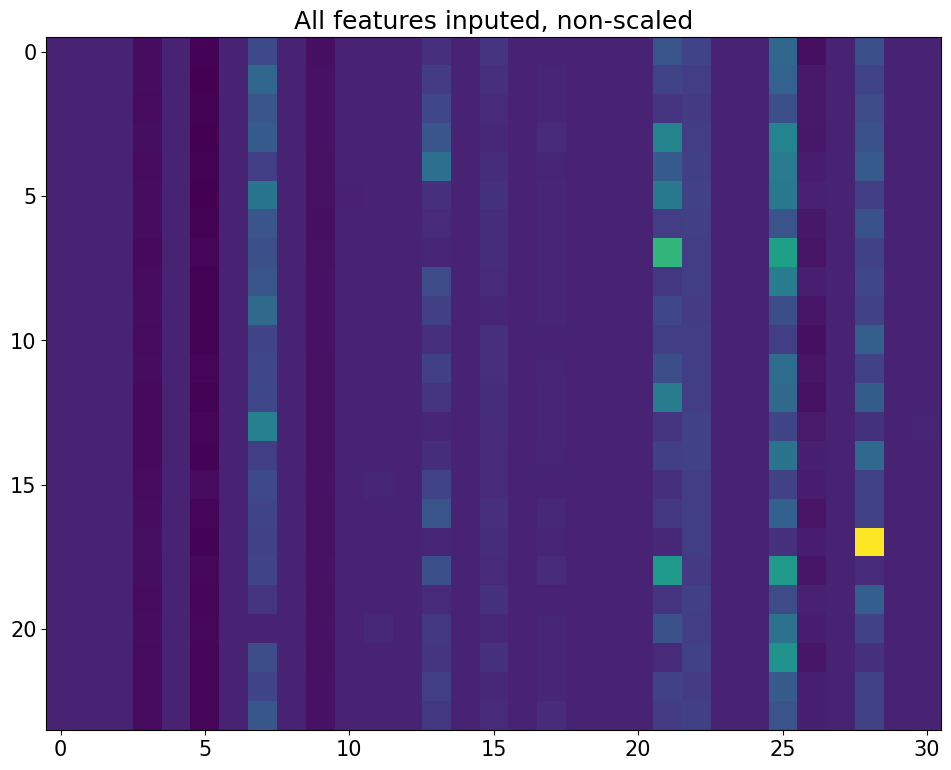

In [11]:
# Remove the NaNs from columns by replacing with the mean

# impute all NaNs in the array and replace with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(all_features_matrix_no_nan)

# replace all NaNs
all_features_new=imp.transform(all_features_matrix_no_nan)

plt.imshow(all_features_new)
plt.title('All features inputed, non-scaled')

print('Data length')
print(len(all_features_new))
print('Resulting matrix shape')
print(all_features_matrix_no_nan.shape)


# Scale features of the feature matrix

Data length
24


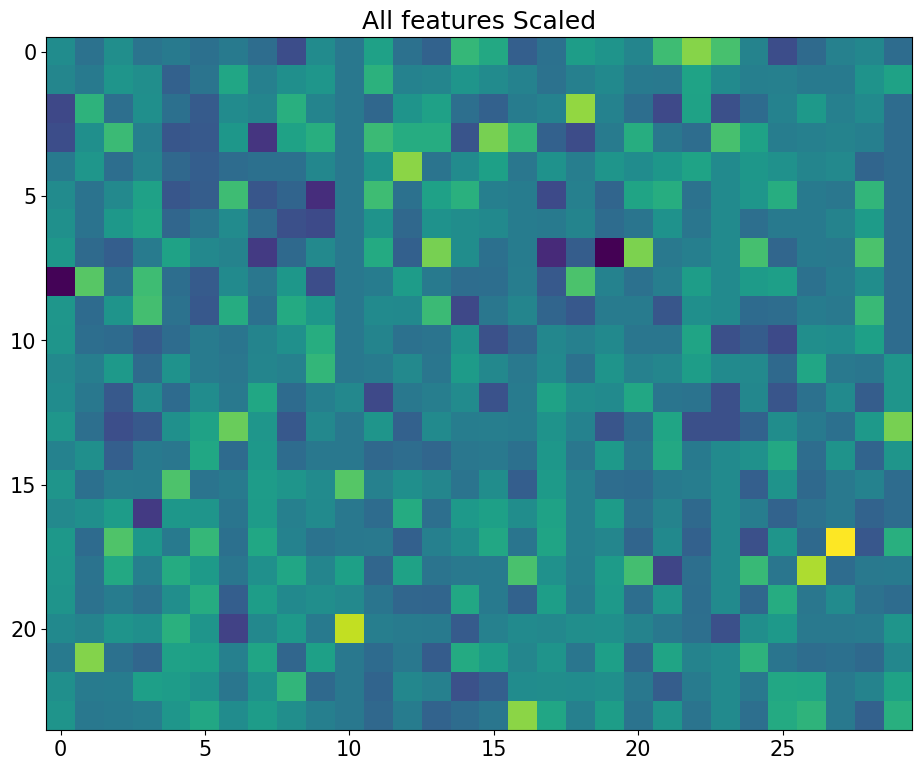

In [12]:

# Normalise all columns of the array
all_features_new_scaled = preprocessing.scale(all_features_new[:,1:])

# show the normalised data
plt.imshow(all_features_new_scaled)
plt.title('All features Scaled')

# show the length
print('Data length')
print(len(all_features_new_scaled))


In [13]:
# define the cell type label

cell_type = all_features_new[:,0]
print('Cell types in numbers')
print(cell_type)


Cell types in numbers
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [14]:
# define the number of features

n_features = len(all_features_new[0,:-1])
print('Number of features')
print(n_features)


Number of features
30


# Doing PCA on data: split based on WG (2 classes)

No handles with labels found to put in legend.


explained variance ratio (first two components): [0.21735439 0.1356378 ]


Text(0, 0.5, 'Principal component 2')

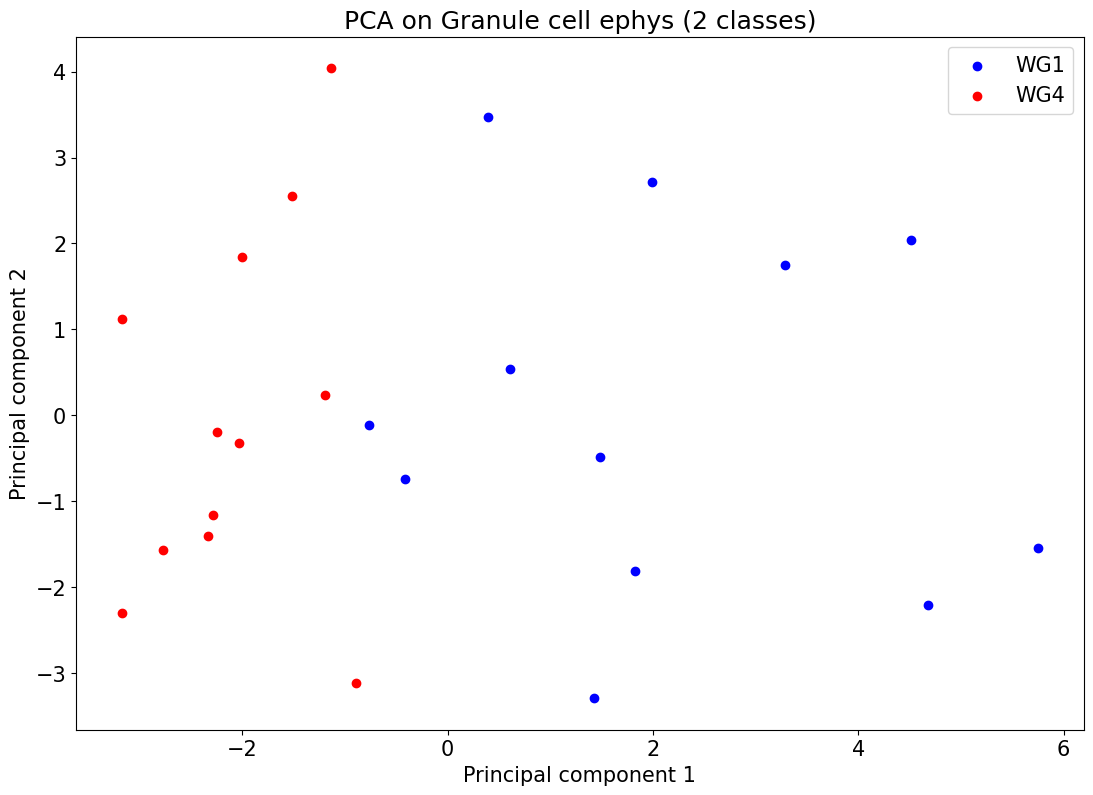

In [15]:

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)

wg1_idx=np.where((cell_type==1))[0]
wg4_idx=np.where((cell_type==4))[0]


fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue')
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell ephys (2 classes)')
plt.legend(['WG1','WG4'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

#plt.savefig('PCA_3_classes.eps', format='eps', dpi=300)

# Pairwise features comparison

Indexes of wg1 and wg4 cells
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[12 13 14 15 16 17 18 19 20 21 22 23]
0.18575772936738766
1.0
0.8398599725400034
0.1748533068932927
0.002945646150532981
9.734567564713263e-05
0.04547470755522374
3.6584553538971e-05
0.8852339144732017
0.3708443333042212
0.9309874465595671
0.0024367348089890145
0.43573066003173655
0.046386593281398644
0.5443701458566098
0.9309874465595671
0.4941245444092638
9.734567564713263e-05
0.7074539677020747
0.0303828219765775
0.06060196971200614
0.7950121719642381
0.002945646150532981
0.024312434274949436
0.40250382378200356
0.15721275334000387
0.32332000913391523
0.4703899167634569
0.0024367348089890145
0.00880113631402272


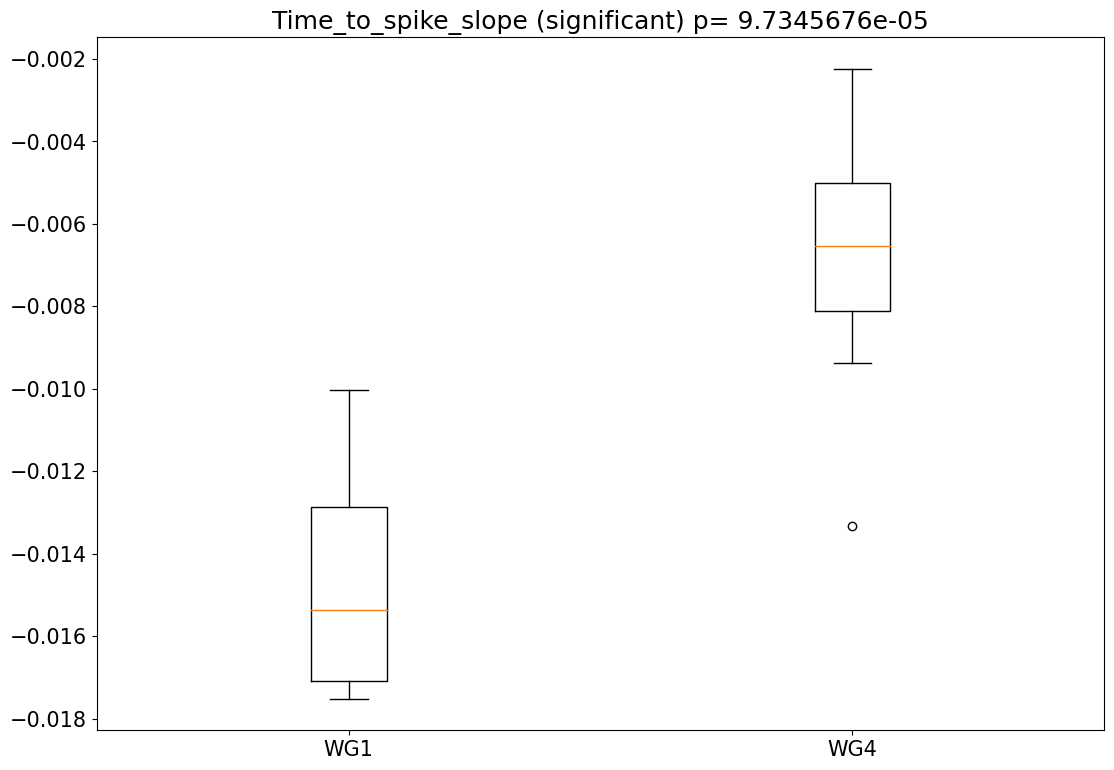

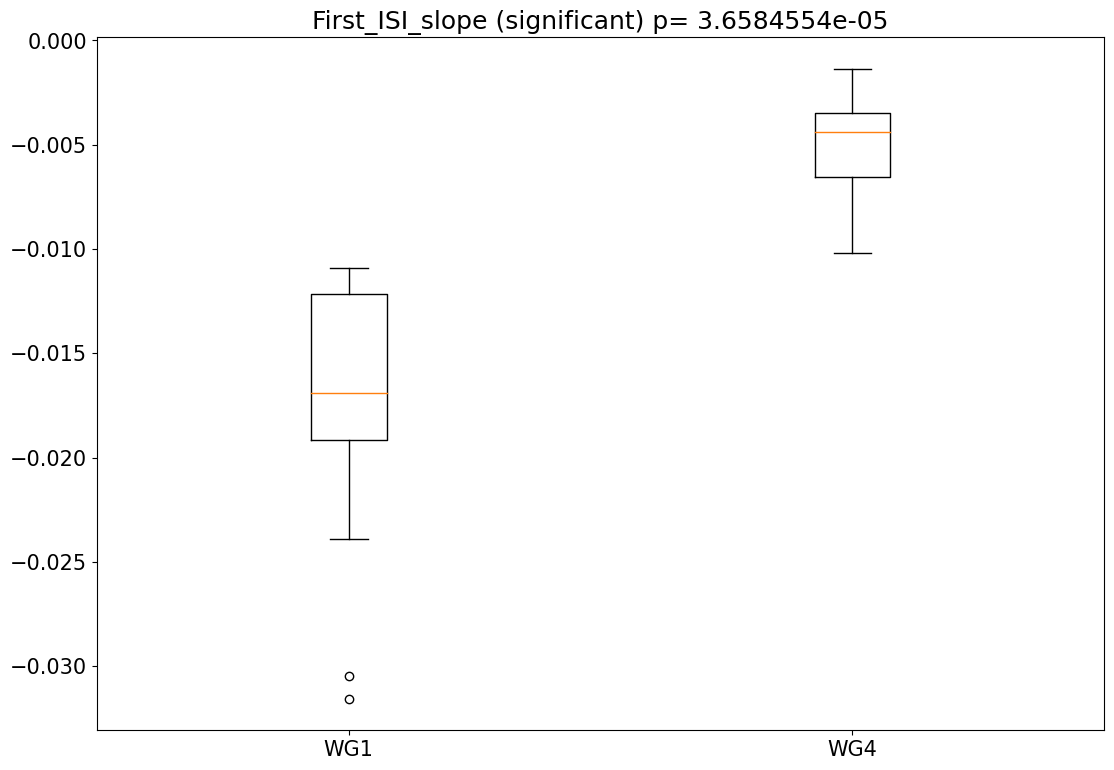

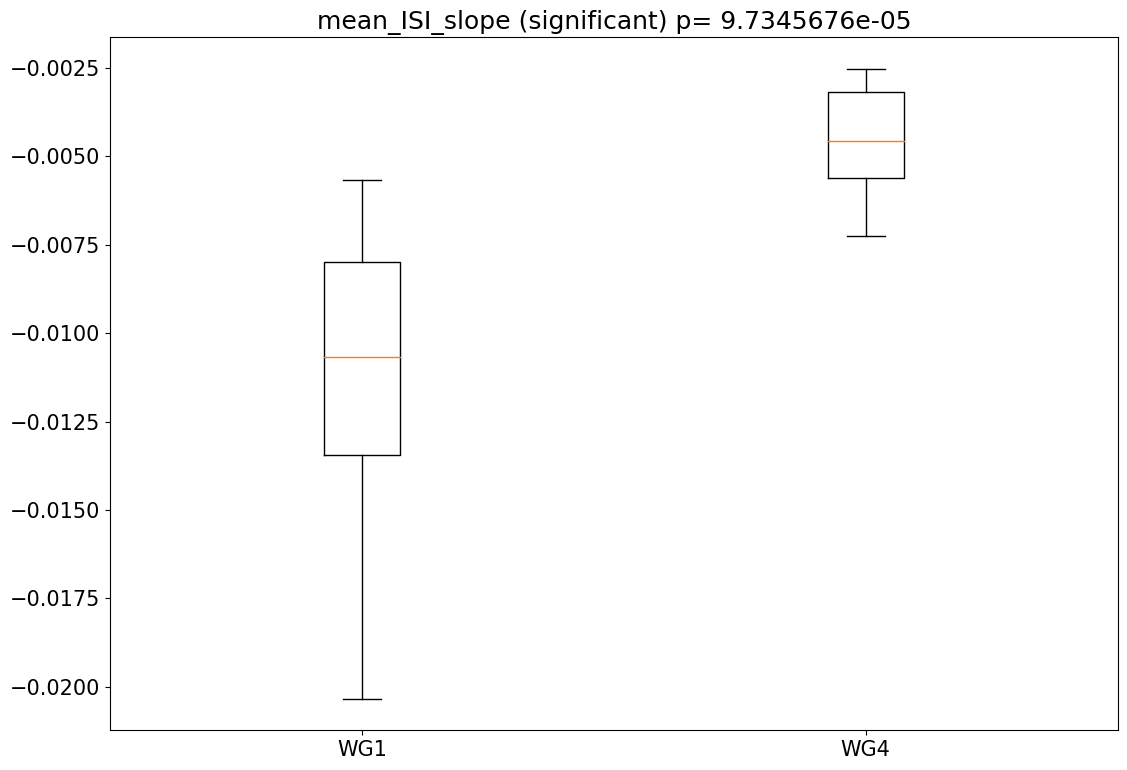

In [16]:
# find indexes of wg1 and wg4 neurons

wg1_idx=np.where(all_features_matrix_no_nan[:,0] == 1)[0]
wg4_idx=np.where(all_features_matrix_no_nan[:,0] == 4)[0]

# sign level
alpha_level=0.05

print('Indexes of wg1 and wg4 cells')
print(wg1_idx)
print(wg4_idx)

# compare all features and compute p_values

p_values=np.zeros(n_features)

# plot the box plots for all cells

for i in np.arange(n_features):

    feature_1=all_features_matrix_no_nan[wg1_idx,i+1]
    feature_2=all_features_matrix_no_nan[wg4_idx,i+1]
    
    # remove nans
    feature_1 = feature_1[~np.isnan(feature_1)]
    feature_2 = feature_2[~np.isnan(feature_2)]

    d,p=stats.mannwhitneyu(feature_1,feature_2)
    print(p)
    # record the p_values
    p_values[i]=p

    # plot the results        
    if p<alpha_level/n_features:
        fig, ax = plt.subplots()
        labels=['WG1','WG4']
    #    plt.violinplot([feature_1,feature_2])
        plt.boxplot([feature_1,feature_2])

        plt.title(feature_names[i]+str(' (significant)') +str(' p= ') +str(np.round(p,12)))
#    else:
#        plt.title(feature_names[i]+str(' (non-significant)') +str(' p= ') +str(np.round(p,12)))
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(np.arange(1, len(labels) + 1))
        ax.set_xticklabels(labels)
    # save figure part
#   plt.savefig(str(str(feature_names[i])+'.eps'), format='eps', dpi=300)

p_values of 30 feature:30 features
[1.85757729e-01 1.00000000e+00 8.39859973e-01 1.74853307e-01
 2.94564615e-03 9.73456756e-05 4.54747076e-02 3.65845535e-05
 8.85233914e-01 3.70844333e-01 9.30987447e-01 2.43673481e-03
 4.35730660e-01 4.63865933e-02 5.44370146e-01 9.30987447e-01
 4.94124544e-01 9.73456756e-05 7.07453968e-01 3.03828220e-02
 6.06019697e-02 7.95012172e-01 2.94564615e-03 2.43124343e-02
 4.02503824e-01 1.57212753e-01 3.23320009e-01 4.70389917e-01
 2.43673481e-03 8.80113631e-03]




([<matplotlib.axis.XTick at 0x1413a7580>,
 [Text(0, 0, '7'),
  Text(1, 0, '5'),
  Text(2, 0, '17'),
  Text(3, 0, '28'),
  Text(4, 0, '11'),
  Text(5, 0, '4'),
  Text(6, 0, '22'),
  Text(7, 0, '29'),
  Text(8, 0, '23'),
  Text(9, 0, '19'),
  Text(10, 0, '6'),
  Text(11, 0, '13'),
  Text(12, 0, '20'),
  Text(13, 0, '25'),
  Text(14, 0, '3'),
  Text(15, 0, '0'),
  Text(16, 0, '26'),
  Text(17, 0, '9'),
  Text(18, 0, '24'),
  Text(19, 0, '12'),
  Text(20, 0, '27'),
  Text(21, 0, '16'),
  Text(22, 0, '14'),
  Text(23, 0, '18'),
  Text(24, 0, '21'),
  Text(25, 0, '2'),
  Text(26, 0, '8'),
  Text(27, 0, '15'),
  Text(28, 0, '10'),
  Text(29, 0, '1')])

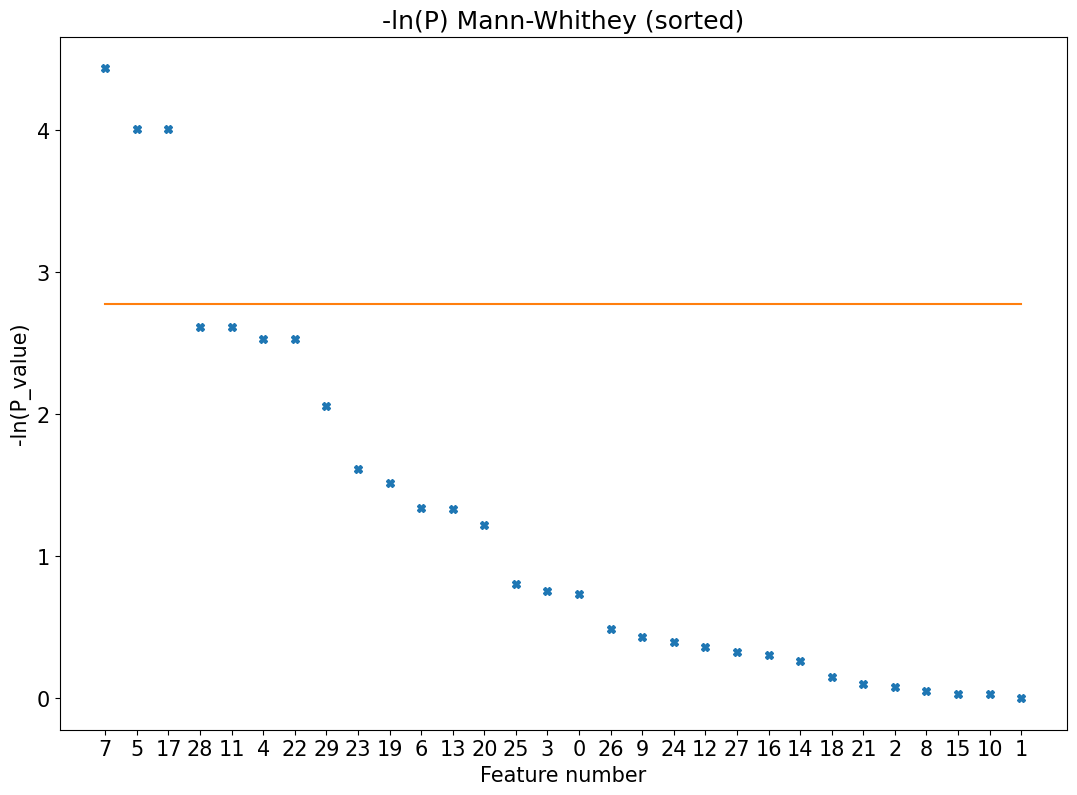

In [17]:
# p-values order is the same for all features and further analysis

print('p_values of 30 feature:' +str(len(p_values)) +str(' features'))
print(p_values)
print('\n')

# significance level
alpha_level=0.05
p_level=alpha_level/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p


plt.plot(np.arange(0,n_features,1),log_p[np.flip(np.argsort(-np.log10(p_values)),0)],'X',np.arange(0,n_features,1),sign_level)
plt.title('-ln(P) Mann-Whithey (sorted)')
plt.ylabel('-ln(P_value)')
plt.xlabel('Feature number')

# xticks
plt.xticks(np.arange(0,n_features,1),np.flip(np.argsort(-np.log(p_values)),0))


# Plot p-values as a bar plot

Text(0.5, 1.0, '-ln(P) K-S test (unsorted)')

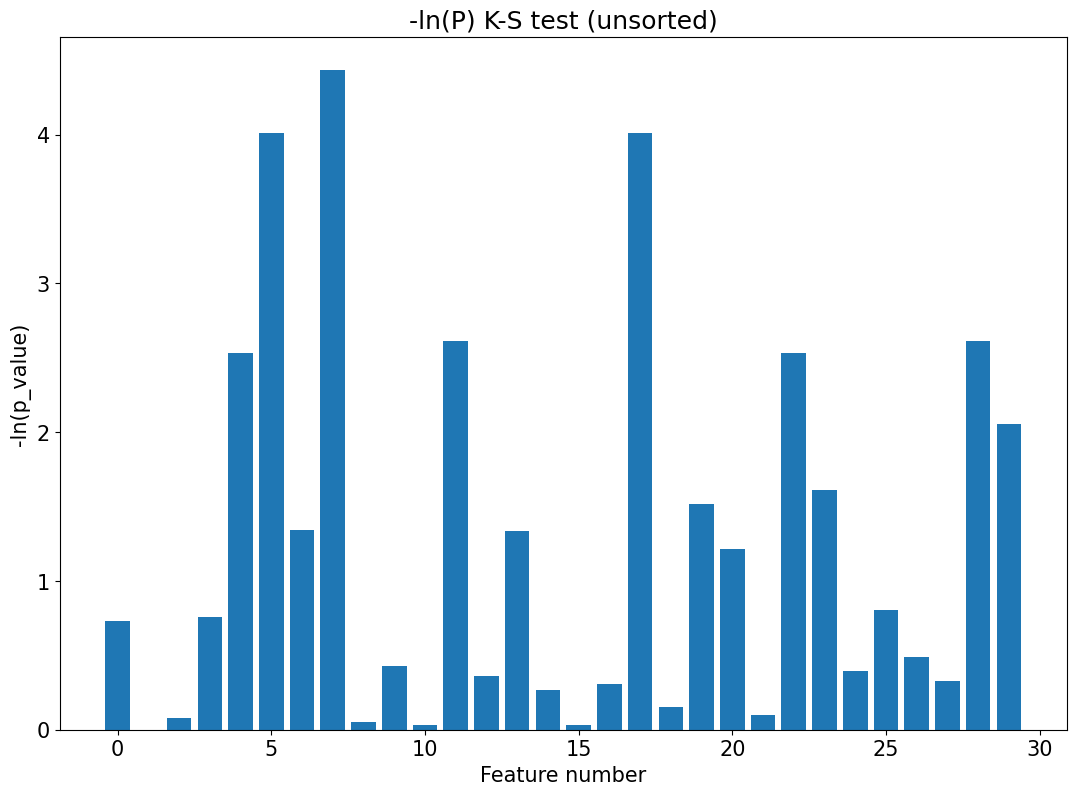

In [18]:
# PLOT p-values as a bar plot

# p-values order is different from all other features

# significance level
p_level=alpha_level/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p


plt.bar(np.arange(0,n_features,1),log_p)
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) K-S test (unsorted)')

# save figure to eps
#plt.savefig('all_features_Mann_Whithney_bonferoni.eps',format='eps',dpi=300)

# Plot 10 most distinct features (p-values)

Names of the important features:


First_ISI_slope
Time_to_spike_slope
mean_ISI_slope
fI_slope
AP_through_slope
voltage_base_mean
AP_up/downstroke_slope


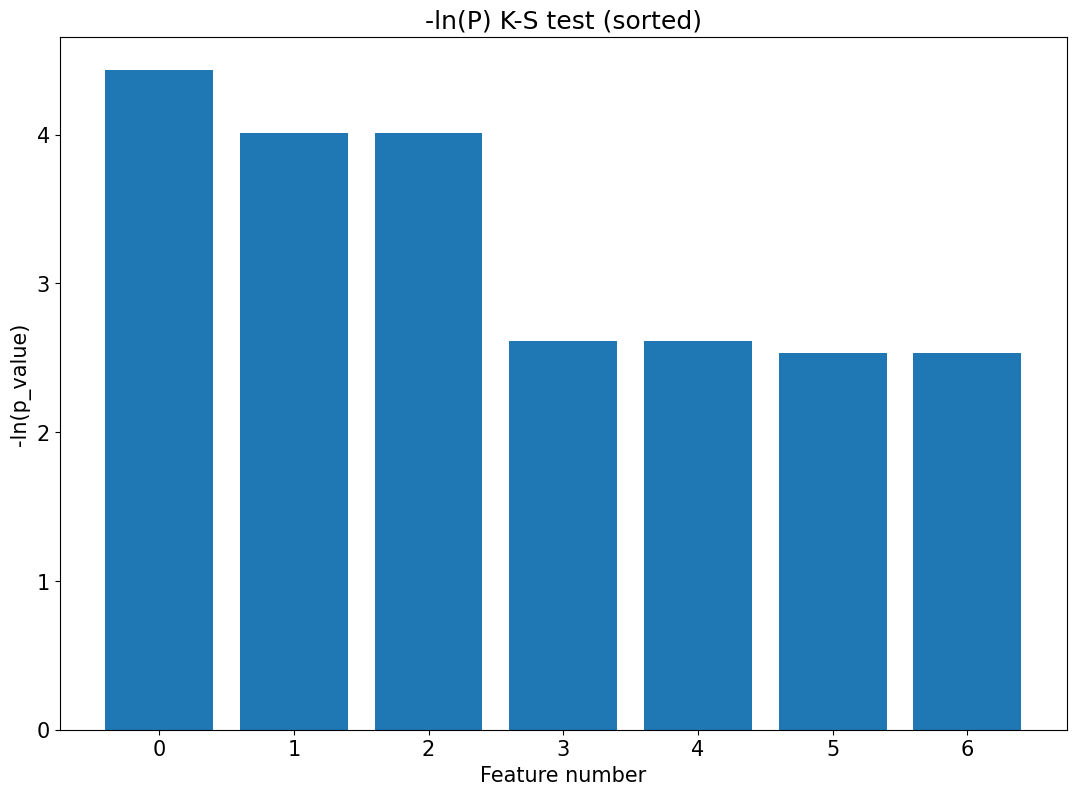

In [19]:
feature_order_idx=np.flip(np.argsort(-np.log10(p_values)),0)
feature_to_show=7


plt.bar(np.arange(0,feature_to_show,1),log_p[feature_order_idx[0:feature_to_show]])
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) K-S test (sorted)')

# show the feature order idx
print('Names of the important features:')
print('\n')
for i in range(feature_to_show):
    print(feature_names[feature_order_idx[i]])

# save figure to eps
#plt.savefig('all_features_MannWhith_bonferoni_10most_significant.eps',format='eps',dpi=300)

# Show two features leading separation

In [20]:
# print features

feature_names


['adaptation_slope',
 'adaptation_slope_rheobase',
 'AP_through_rheobase',
 'AP_downstroke_slope',
 'voltage_base_mean',
 'Time_to_spike_slope',
 'R_in',
 'First_ISI_slope',
 'AP_thr_rheobase',
 'AP_upstroke_slope',
 'voltage_base_sigma',
 'AP_through_slope',
 'Time_to_spike_slope_rheobase',
 'AP_height_slope',
 'AP_downstroke_rheobase',
 'AP_up/downstroke_rheobase',
 'taum_mean',
 'mean_ISI_slope',
 'AP_width_slope',
 'AP_thr_slope',
 'First_ISI_slope_rheobase',
 'AP_height_rheobase',
 'AP_up/downstroke_slope',
 'AP_width_rheobase',
 'mean_ISI_slope_rheobase',
 'AP_upstroke_rheobase',
 'taum_sigma',
 'Rheobase_current',
 'fI_slope',
 'Rheobase_freq']

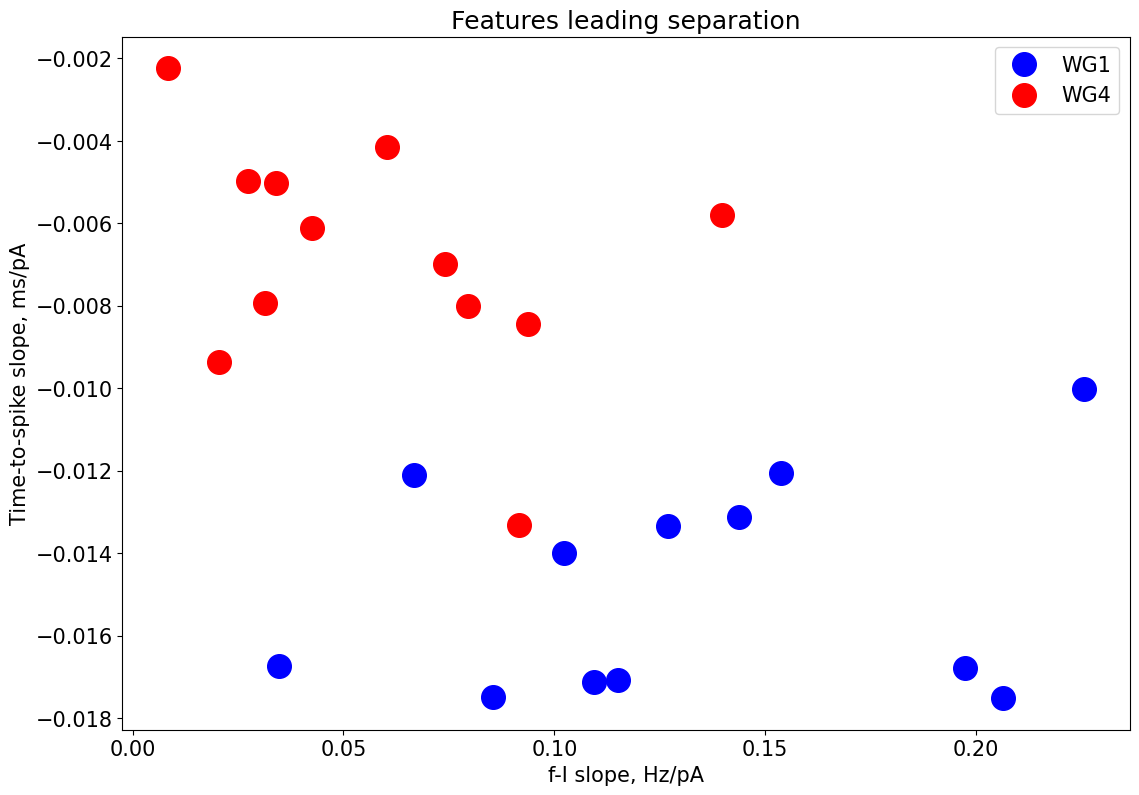

In [21]:

# find indexes of WG1 and WG4 cells
wg1_idx=np.where(all_features_matrix_no_nan[:,0] == 1)[0]
wg4_idx=np.where(all_features_matrix_no_nan[:,0] == 4)[0]

# f-I slope
x_f_wg1 = all_features_matrix_no_nan[wg1_idx,-2]
y_f_wg1 = all_features_matrix_no_nan[wg1_idx,6]
z_f_wg1 = all_features_matrix_no_nan[wg1_idx,18]

# time-to-spike slope
x_f_wg4 = all_features_matrix_no_nan[wg4_idx,-2]
y_f_wg4 = all_features_matrix_no_nan[wg4_idx,6]
z_f_wg4 = all_features_matrix_no_nan[wg4_idx,18]

# plot the results
plt.plot(x_f_wg1,y_f_wg1,'.',c='blue', markersize=34)
plt.plot(x_f_wg4,y_f_wg4,'.',c='red', markersize=34)
plt.xlabel('f-I slope, Hz/pA')
plt.ylabel('Time-to-spike slope, ms/pA')
plt.title('Features leading separation')
plt.legend(('WG1','WG4'))

#plt.savefig('ephys_features_model_2D.pdf',format = 'pdf')


# Show features in the PCA space

No handles with labels found to put in legend.


explained variance ratio (first two components): [0.21735439 0.1356378 ]


Text(0, 0.5, 'Principal component 2')

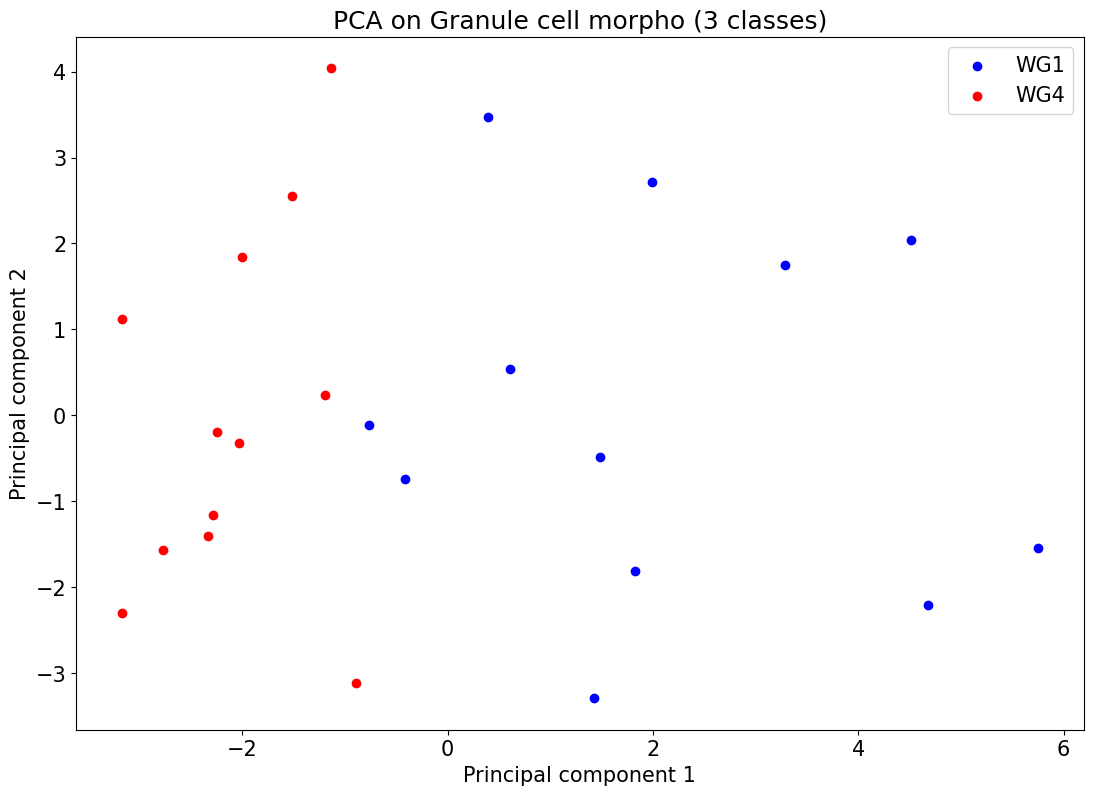

In [22]:

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)
wg1ts_idx=np.zeros(1)
wg1_idx=np.where(cell_type==1)
wg4_idx=np.where(cell_type==4)
wg1ts_idx=np.where(cell_type==11)

fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue')
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red')
plt.scatter(X_r[wg1ts_idx, 0],X_r[wg1ts_idx, 1],c='green')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell morpho (3 classes)')
plt.legend(['WG1','WG4'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Random forest classification for 2 classes

Random forest classification score: 1.0


Random forest classification performance: 0.9583333333333334
2 classes
Sum of feature importances: 1.0
Order of features
[ 7  5 17 22  4 11 28 29 26  6 19 13 20 27 16 10 18 25  0  2  9 12 24 14
  1 15  3  8 21 23]


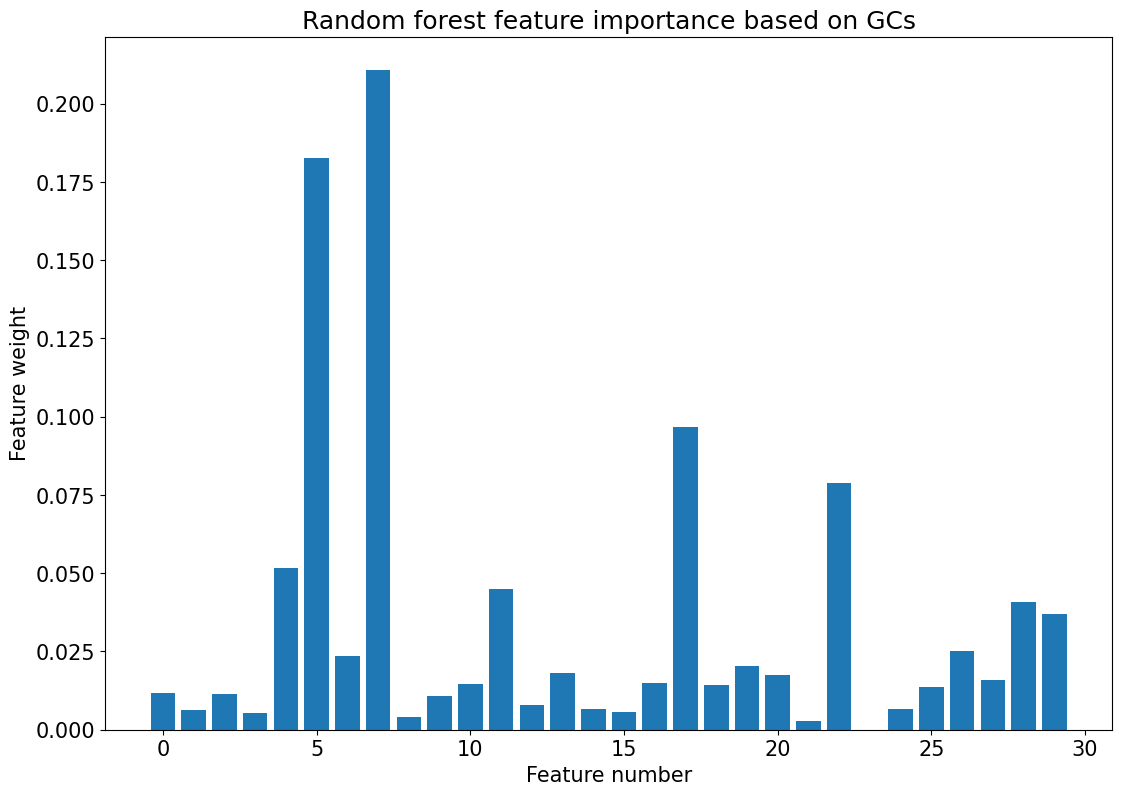

In [24]:
# do random forest classifier on original data

# CELL_TYPES FOR WG1+WG1TS, WG4

# process the cell type: WG1TS -> WG1 conversion
cell_type_14=np.array(cell_type)
#cell_type_14[np.where(cell_type_14 == 11)]=1

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(all_features_new_scaled, cell_type_14)

# get the scores of the trees and pring them
scores = clf.score(all_features_new_scaled, cell_type_14)
print('Random forest classification score: ' + str(scores))


oob_error = clf.oob_score_
print('\n')
print('Random forest classification performance: ' + str(oob_error))

print('2 classes')
feature_importance=clf.feature_importances_

# [np.flip(np.argsort(feature_importance),0)]
plt.bar(np.arange(0,n_features,1), feature_importance)


plt.title('Random forest feature importance based on GCs')
plt.xlabel('Feature number')
plt.ylabel('Feature weight')

#plt.xticks(np.arange(0,n_features,1),np.flip(np.argsort(feature_importance),0))

print('Sum of feature importances: ' + str(np.sum(clf.feature_importances_)))

print('Order of features')
print(np.flip(np.argsort(feature_importance),0))


# save the results in figures
#plt.bar(np.arange(0,n_features,1),log_p)
#plt.savefig('Random_forest_WG1WG1TS_WG4_weights.eps', format='eps', dpi=300)


# Show the feature importance of 10 most important features

Names of the important features:


First_ISI_slope
Time_to_spike_slope
mean_ISI_slope
AP_up/downstroke_slope
voltage_base_mean
AP_through_slope
fI_slope


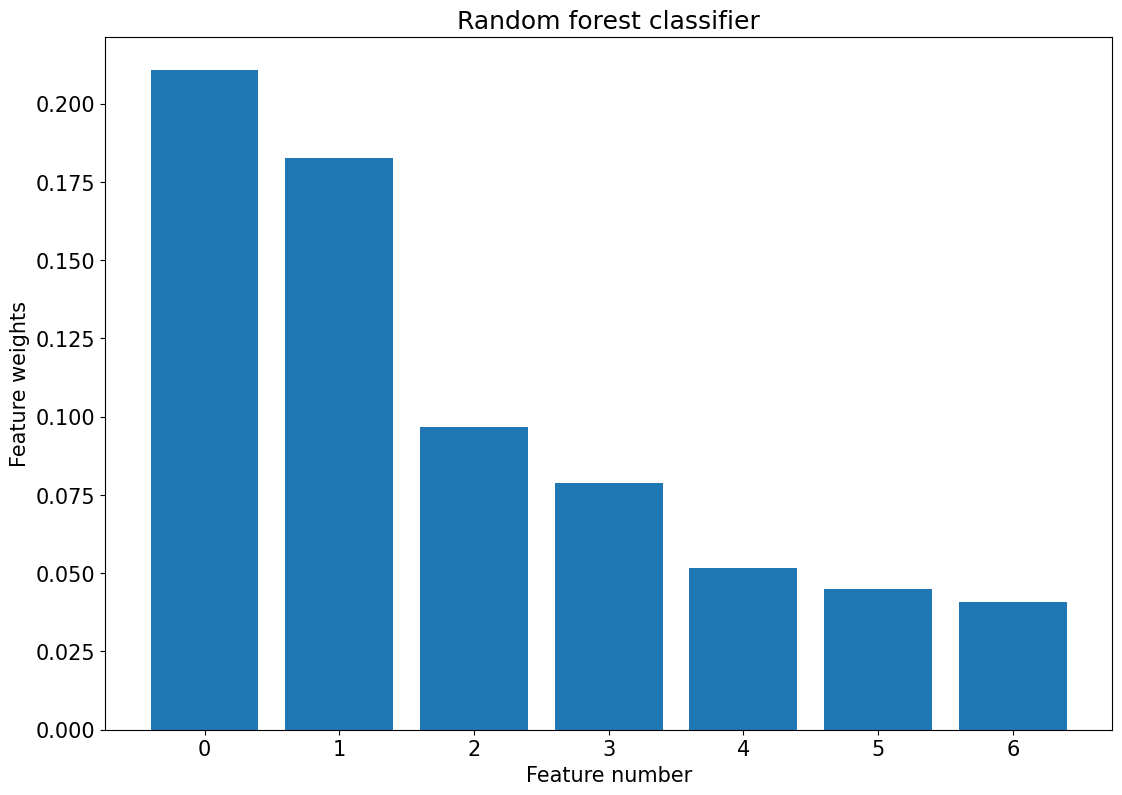

In [25]:

# feature order
feature_order_idx=np.flip(np.argsort(feature_importance),0)
feature_to_show=7


plt.bar(np.arange(0,feature_to_show,1),feature_importance[feature_order_idx[0:feature_to_show]])
plt.ylabel('Feature weights')
plt.xlabel('Feature number')
plt.title('Random forest classifier')

# show the feature order idx
print('Names of the important features:')
print('\n')
for i in range(feature_to_show):
    print(feature_names[feature_order_idx[i]])

# save figure to eps
#plt.savefig('all_features_random_forest_10_largest.eps',format='eps',dpi=300)


# Random forest after PCA: PC1 and PC2

Classifier performance, PC1 & PC2 features only: 0.9166666666666666
RandomForest with 50 estimators with features [0, 1] has a score of 1.0


Text(0, 0.5, 'Principal component 2')

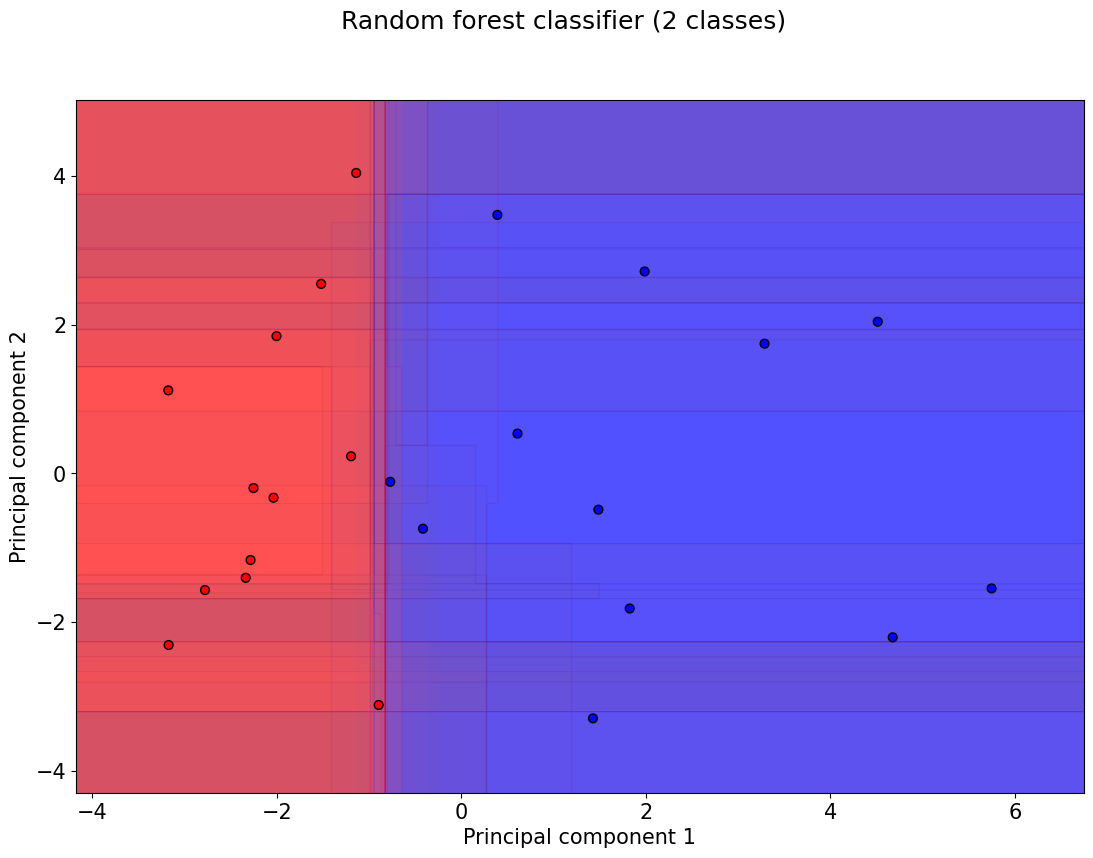

In [34]:
# Plot the decision boundary only for Random forest classifier


# Parameters
n_classes = 2
n_estimators = 50
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)               


pair=[0,1]

X = X_r[:, pair]
y = cell_type_14



# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf = clone(model)
clf = model.fit(X, y)

# get the scores of the trees
scores = clf.score(X, y)

# print the model score
print('Classifier performance, PC1 & PC2 features only: ' + str(clf.oob_score_))

# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(model)).split(
    ".")[-1][:-2][:-len("Classifier")]

model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(
        len(model.estimators_))
print(model_details + " with features", pair,
      "has a score of", scores)


# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(model, DecisionTreeClassifier):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(['b','r']))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)

# Plot the training points, these are clustered together and have a blue-red outline

plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['b','r']),
            edgecolor='k', s=40)

plt.suptitle("Random forest classifier (2 classes)")
plt.axis("tight")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
#plt.xlim((-1.5, 1.5))

#plt.savefig('Random_forest_visualisation_cortex.svg', format='svg', dpi=300)


# Running tSNE on post-PCA ephys feature set

Ephys dataset, perplexity=20 in 0.31 sec


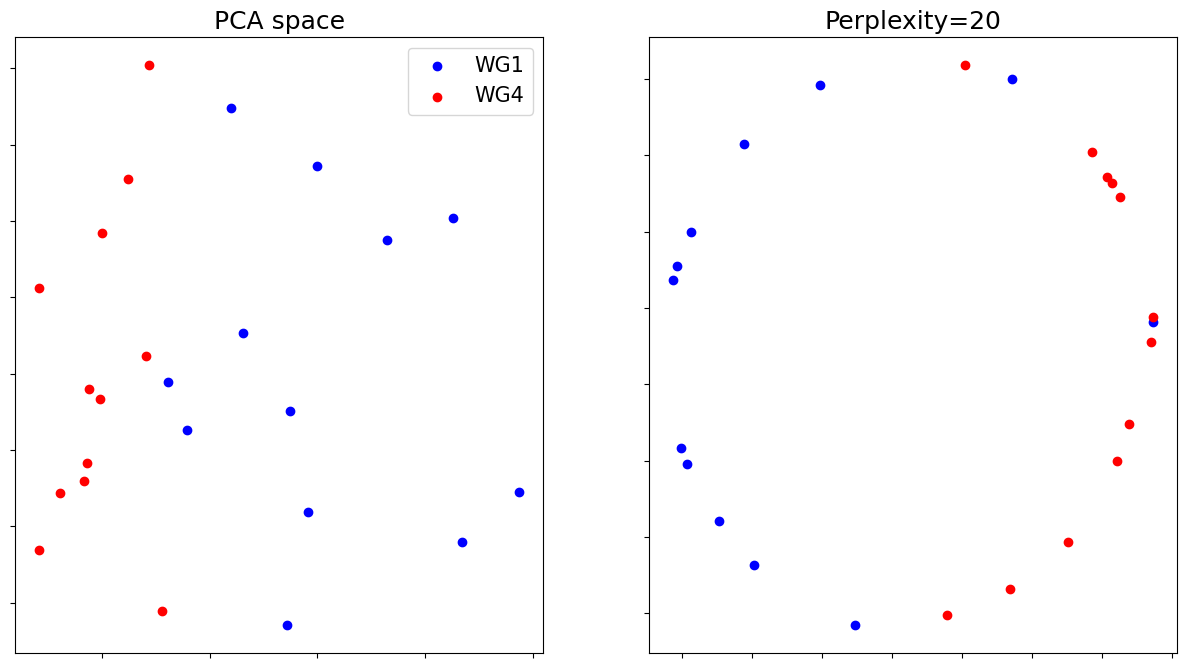

In [35]:

# Dataset description
#n_samples = 119

# Aiming to project to 2 componenets
n_components = 2

(fig, subplots) = plt.subplots(1, 2, figsize=(15, 8))
perplexities = [20]

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

X = X_r[:,:]
y = cell_type_14

idx_1=np.where(cell_type==1)
idx_2=np.where(cell_type==4)


ax = subplots[0]

ax.scatter(X_r[idx_1, 0],X_r[idx_1, 1],c='blue')
ax.scatter(X_r[idx_2, 0],X_r[idx_2, 1],c='red')

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('PCA space')

# split by case type
ax.legend(['WG1','WG4'])


for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=20000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Ephys dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)

    # plot different cells with different labels
    
    ax.scatter(Y[idx_1, 0],Y[idx_1, 1],c='blue')
    ax.scatter(Y[idx_2, 0],Y[idx_2, 1],c='red')
    
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

    
#plt.savefig('tSNE_perplexity_20_CASE.eps', format='eps', dpi=300)

#plt.show()

# Random forest after tSNE

Classifier performance, tSNE1 and tSNE2: 0.75
RandomForest with 200 estimators with features [0, 1] has a score of 1.0


Text(0, 0.5, 'tSNE 2')

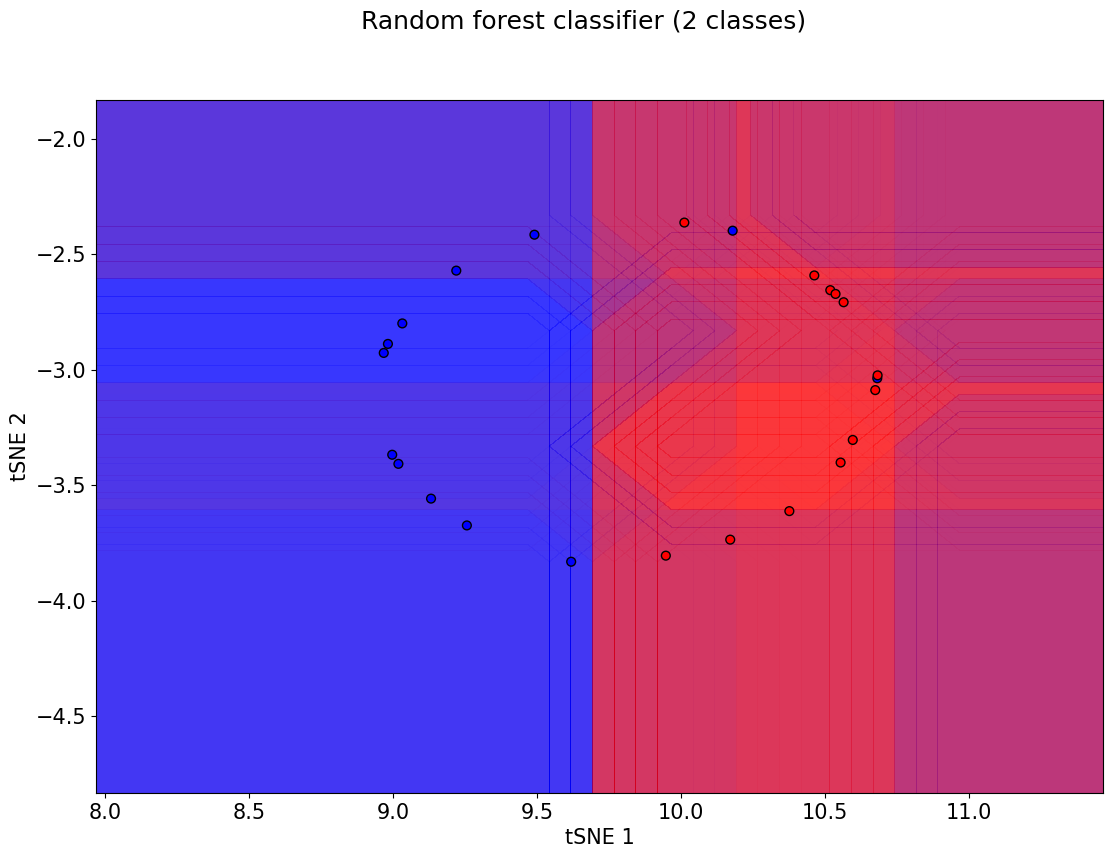

In [36]:
# Plot the decision boundary only for Random forest classifier


# Parameters
n_classes = 2
n_estimators = 200
cmap = plt.cm.RdYlBu
plot_step = 0.5  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)                    


pair=[0,1]

#X = X_r[:, pair]
X = Y
y = cell_type_14



# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf = clone(model)
clf = model.fit(X, y)

# get the scores of the trees
scores = clf.score(X, y)

# print the model score
print('Classifier performance, tSNE1 and tSNE2: ' + str(clf.oob_score_))

# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(model)).split(
    ".")[-1][:-2][:-len("Classifier")]

model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(
        len(model.estimators_))
print(model_details + " with features", pair,
      "has a score of", scores)


# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(model, DecisionTreeClassifier):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(['b','r']))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)
#cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
#                        c=Z_points_coarser, cmap=cmap,
#                        edgecolors="none")

# Plot the training points, these are clustered together and have a blue-red outline


plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['b','r']),
            edgecolor='k', s=40)

plt.suptitle("Random forest classifier (2 classes)")
plt.axis("tight")
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
#plt.xlim((-1.5, 1.5))

#plt.savefig('Random_forest_visualisation_tSNE.svg', format='svg', dpi=300)


# k-means clustering on PCA features: 2 clusters

n_clusters: 2, 	 n_samples 24, 	 n_features 30
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.02s	596	0.788	0.792	0.790	0.833	0.783	0.126
random   	0.01s	592	0.655	0.668	0.662	0.681	0.650	0.137
PCA-based	0.00s	614	0.367	0.375	0.371	0.420	0.350	0.106
__________________________________________________________________________________


/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_24611/2354729682.py:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_24611/2354729682.py:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')


([], [])

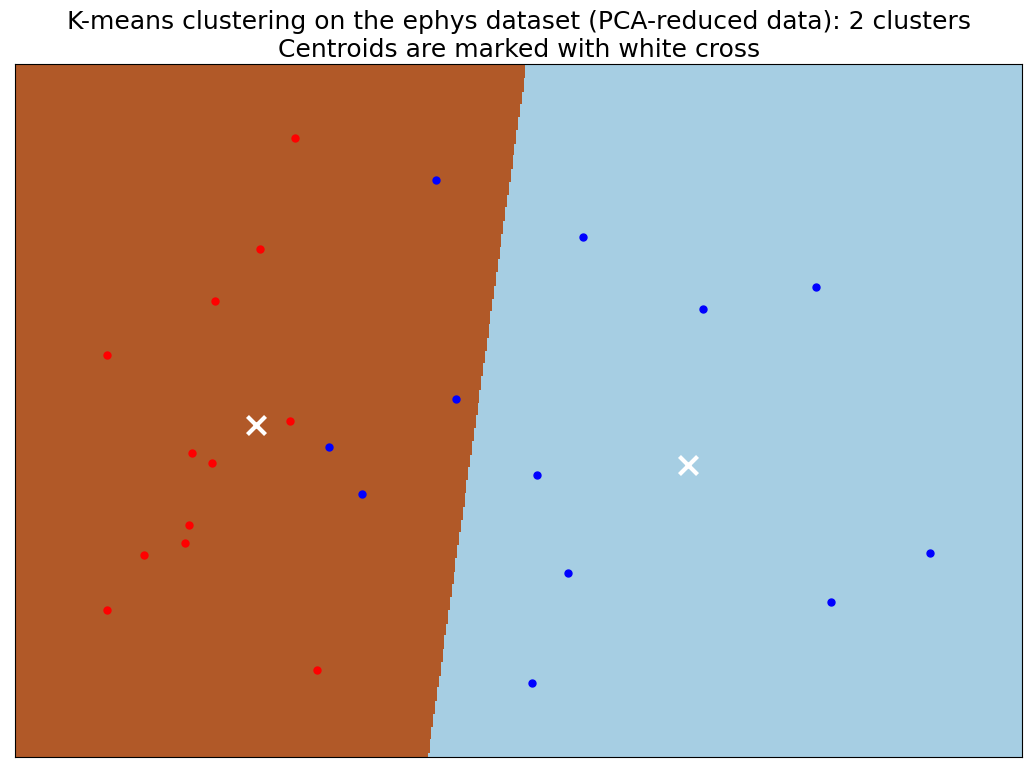

In [44]:
# run k-means on the code: 2 clusters

# set up a random seed
np.random.seed(0)

data = all_features_new_scaled

n_samples, n_features = data.shape
n_clusters = 2
labels = cell_type_14
#labels = digits.target

sample_size = len(cell_names)

print("n_clusters: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plot all WG1 
plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the ephys dataset (PCA-reduced data): 2 clusters\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#plt.savefig('k_means_PCA.eps', format='eps', dpi=300)

# k-means clustering on post tSNE features: 2 clusters

n_clusters: 2, 	 n_samples 24, 	 n_features 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	6	0.655	0.668	0.662	0.681	0.650	0.516
random   	0.01s	6	0.655	0.668	0.662	0.681	0.650	0.516
PCA-based	0.00s	6	0.463	0.465	0.464	0.543	0.446	0.509
__________________________________________________________________________________


/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_24611/2138531395.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_24611/2138531395.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')


([], [])

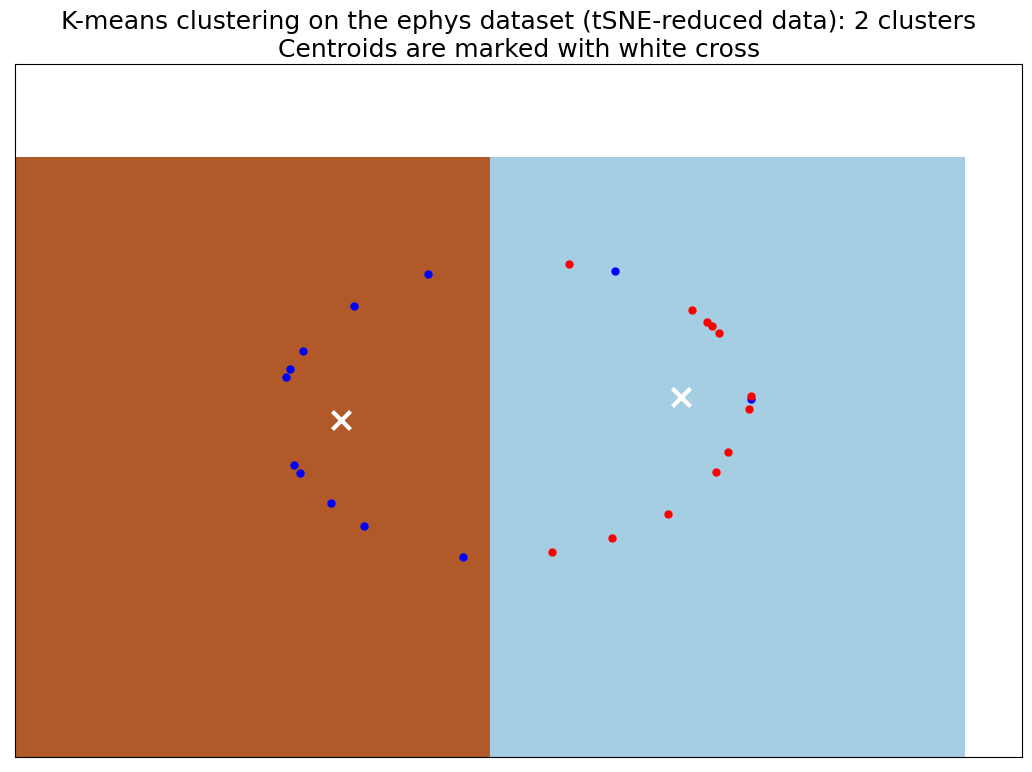

In [48]:
# run k-means on the code: 2 clusters

data = Y

n_samples, n_features = data.shape
n_clusters = 2
labels = cell_type_14
#labels = digits.target

#sample_size = 119

print("n_clusters: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

# no PCA post-processing
#reduced_data = PCA(n_components=2).fit_transform(data)
reduced_data=data
reduced_data = reduced_data.astype(np.double)

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.5     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()].astype(np.float32))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plot all WGs
plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the ephys dataset (tSNE-reduced data): 2 clusters\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#plt.savefig('k_means_tSNE.eps', format='eps', dpi=300)
